In [25]:
# ARC Simulation
from __future__ import division

from platform import python_version
print(python_version())

import math as mh
import argparse
import meep as mp
import time
import numpy as np
import matplotlib.pyplot as plt
from meep.materials import  cSi, SiO2, Si3N4
import math as mh
#from mayavi import mlab


3.10.4


In [26]:
sx=10
sy=10
rd = 0.5      #deepth of texture
eps_Si=12
eps_air=1
eps=4
T_Si=2
T_Arc=0.1
dpml = 1.0
cell = mp.Vector3(sx+2*dpml, sy+2*dpml, 0)
pml_layers = [mp.PML(dpml)]
resolution = 100
nfreq = 1000
fcen = 1.75  # pulse center frequency
df = 1.5  # pulse width (in frequency)

In [27]:
#geometry = [mp.Block(mp.Vector3(T_Si, sy, mp.inf), center=mp.Vector3(0, 0), material=mp.Medium(epsilon=eps_Si))]
geometry = [mp.Block(
                     size = mp.Vector3(sx, sy, mp.inf), 
                     center = mp.Vector3(0, 0), 
                     material=mp.Medium(epsilon=eps_air)
                     )
           ]

In [28]:
sources = [mp.Source(
                     mp.GaussianSource(fcen, fwidth=df), 
                     component=mp.Ez, 
                     center=mp.Vector3(1 , 0), 
                     size=mp.Vector3(0, 0.5*sy-2*dpml)
                    )
          ]

     block, center = (0,0,0)
          size (10,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)


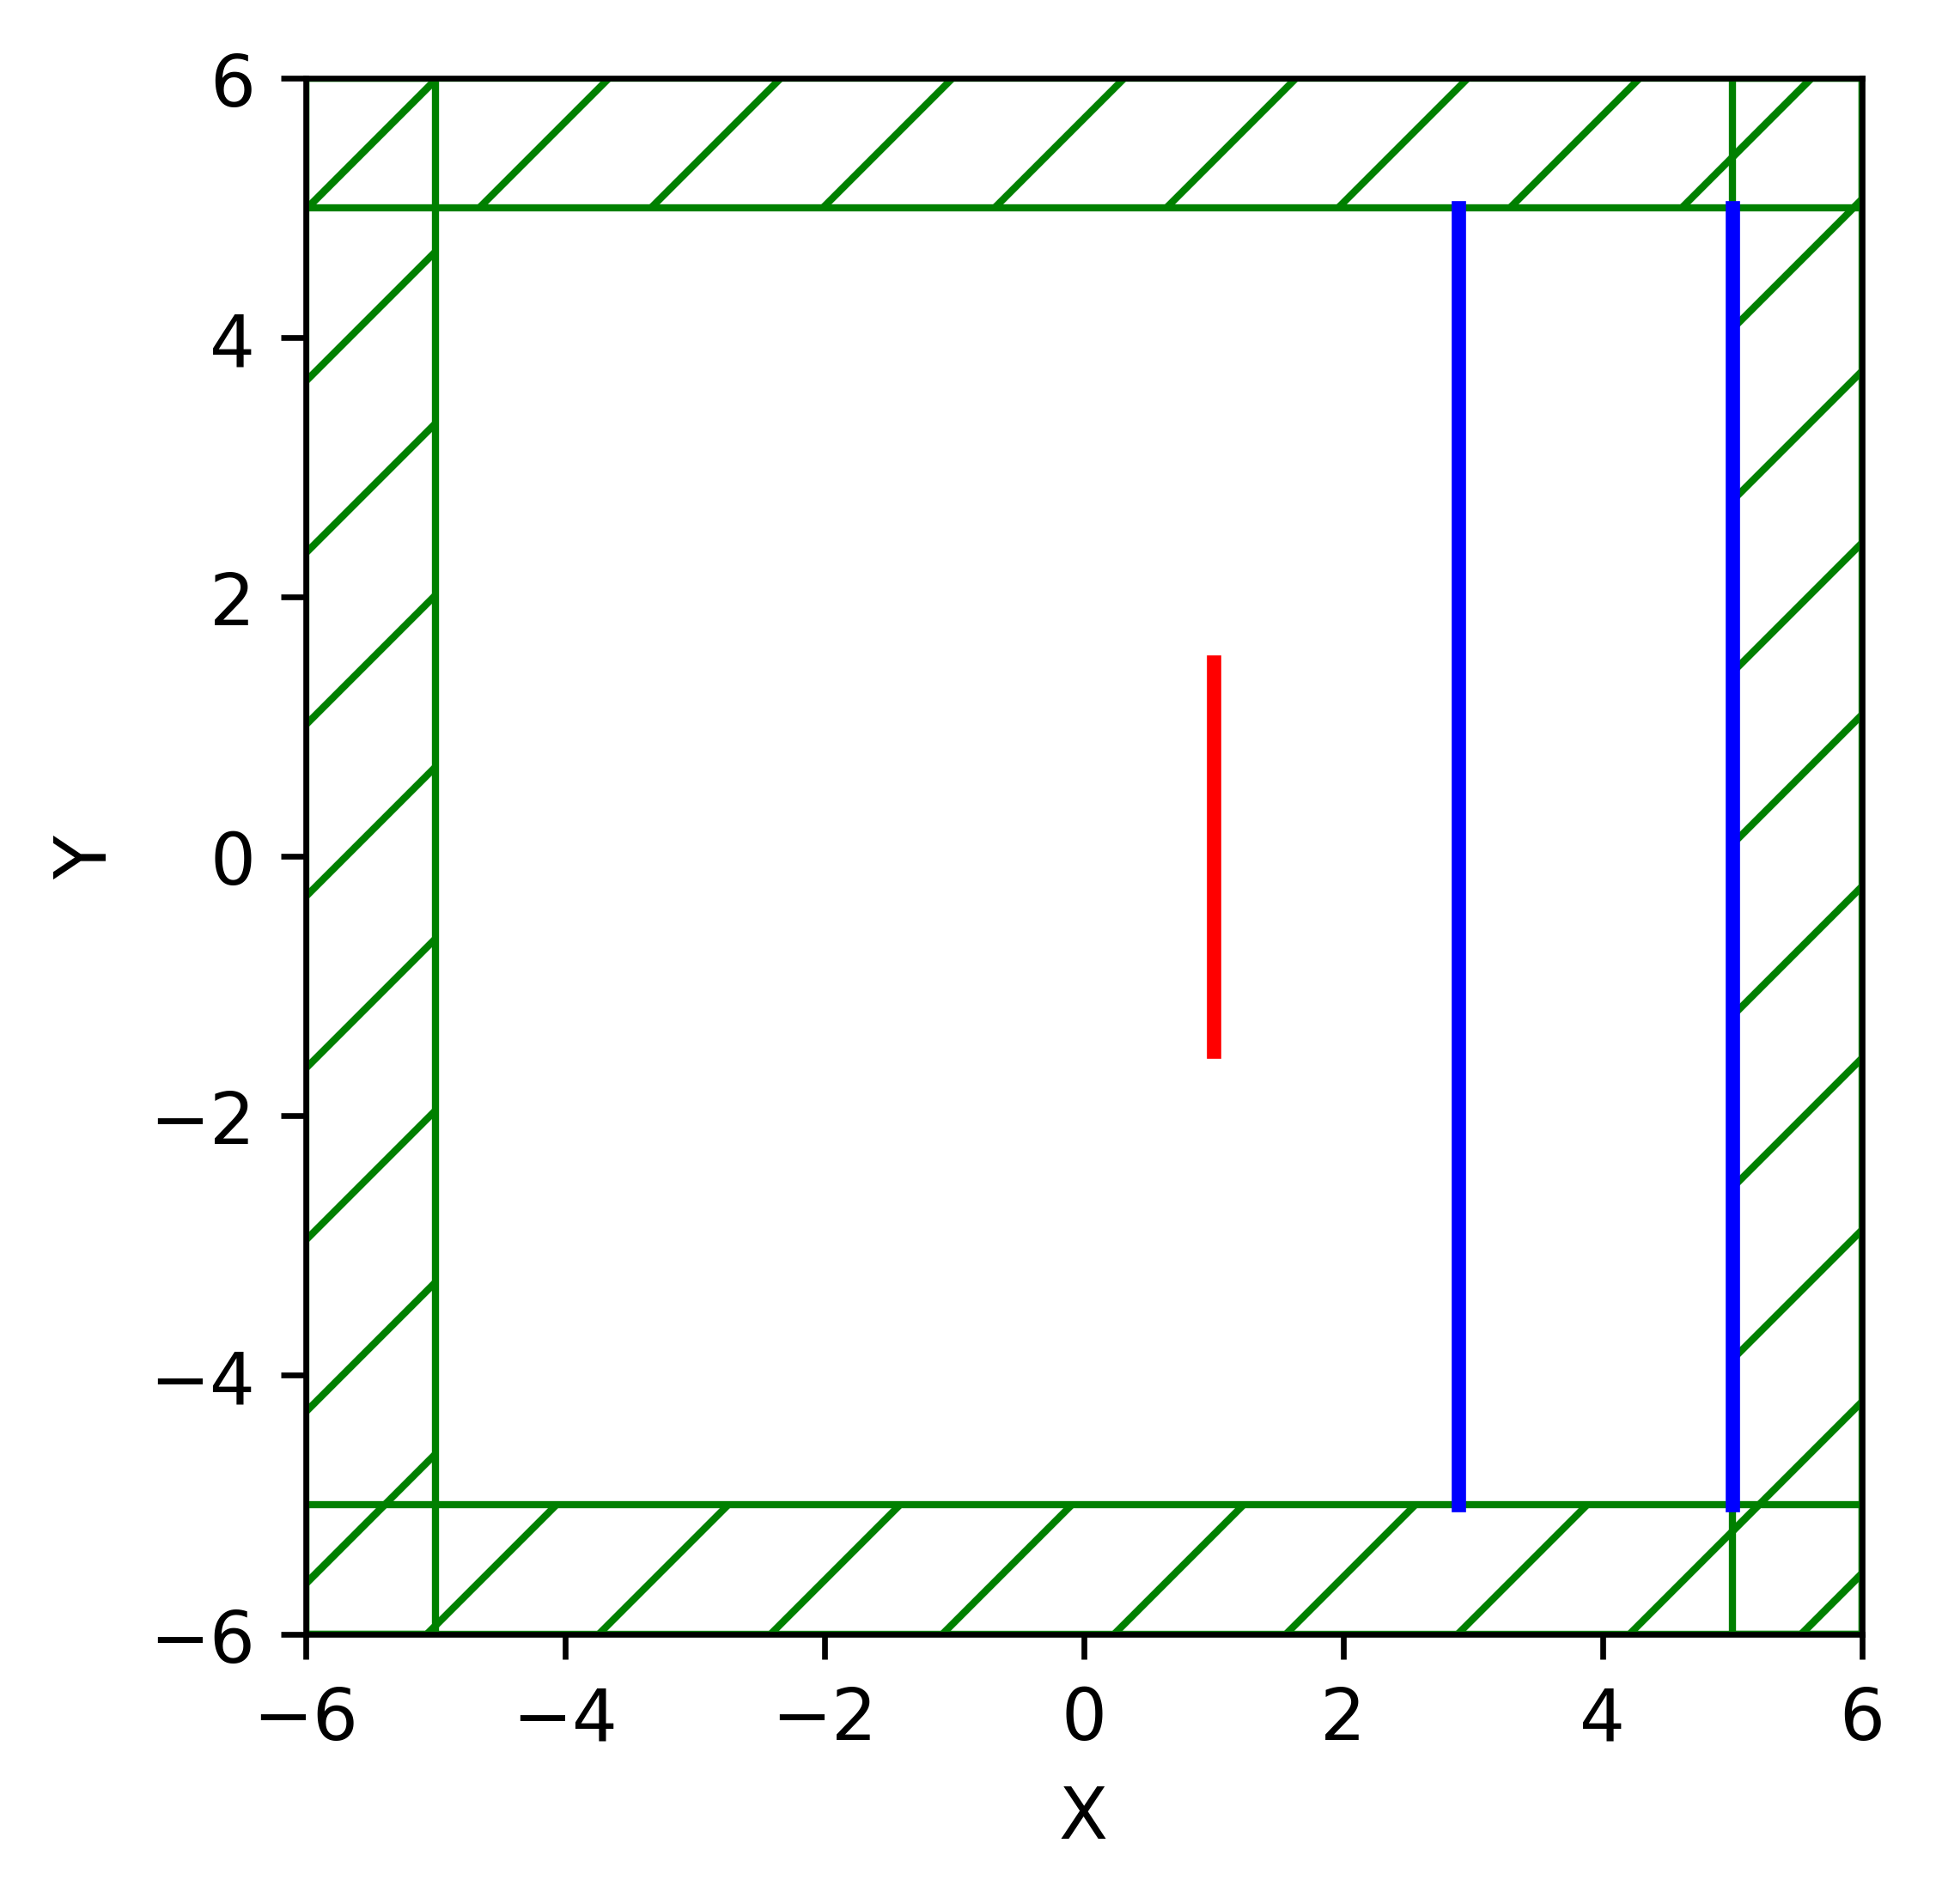

In [29]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)

refl_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx-T_Si-1.1*T_Arc, 0), 
                          size=mp.Vector3(0, sy)

                          )

refl_1 = sim.add_flux(
                      fcen, 
                      df, 
                      nfreq, 
                      refl_1_fr
                      )

tran_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx, 0), 
                          size=mp.Vector3(0, sy)
                          )
tran_1 = sim.add_flux(fcen, 
                      df, 
                      nfreq, 
                      tran_1_fr
                      )

plt.figure(dpi=600)
sim.plot2D()
plt.show()

In [30]:
pt = mp.Vector3(0.5*sx-0.1, 0)
sim.run(mp.at_beginning(mp.output_epsilon),
                until_after_sources=mp.stop_when_fields_decayed(50, mp.Ez, pt, 1e-3))
no_ARC_refl_data = sim.get_flux_data(refl_1)

-----------
Initializing structure...
time for choose_chunkdivision = 0.00154495 s
Working in 2D dimensions.
Computational cell is 12 x 12 x 0 with resolution 100
     block, center = (0,0,0)
          size (10,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 3.56446 s
-----------
creating output file "./eps-000000000.h5"...
on time step 228 (time=1.14), 0.0175532 s/step
on time step 490 (time=2.45), 0.0153529 s/step
on time step 745 (time=3.725), 0.0157245 s/step
on time step 994 (time=4.97), 0.0161037 s/step
on time step 1252 (time=6.26), 0.015536 s/step
on time step 1519 (time=7.595), 0.0150025 s/step
on time step 1787 (time=8.935), 0.0149573 s/step
on time step 2053 (time=10.265), 0.0150877 s/step
on time step 2326 (time=11.63), 0.0146558 s/step
on time step 2598 (time=12.99), 0.0147273 s/step
on time step 2877 (time=14.385), 0.0143659 s/step
on time step 3159 (time=15.795), 0.0142176 s/step
on time s

In [31]:
no_ARC_tran_flux = mp.get_fluxes(tran_1)
no_ARC_refl_flux = mp.get_fluxes(refl_1)
no_ARC_tran_flux = mp.get_fluxes(tran_1)
no_ARC_refl_flux = mp.get_fluxes(refl_1)


no_ARC_ttran_flux = np.asarray(mp.get_fluxes(tran_1))
no_ARC_rrefl_flux = np.asarray(mp.get_fluxes(refl_1))
no_ARC_ttran_flux + no_ARC_rrefl_flux

array([2.75444251e-06, 2.87404828e-06, 2.99859617e-06, 3.12827507e-06,
       3.26328639e-06, 3.40384177e-06, 3.55015813e-06, 3.70245430e-06,
       3.86095223e-06, 4.02588245e-06, 4.19749018e-06, 4.37603793e-06,
       4.56180240e-06, 4.75506804e-06, 4.95612153e-06, 5.16525138e-06,
       5.38275302e-06, 5.60893591e-06, 5.84412774e-06, 6.08867299e-06,
       6.34292733e-06, 6.60725269e-06, 6.88201750e-06, 7.16760302e-06,
       7.46441154e-06, 7.77287061e-06, 8.09342911e-06, 8.42654681e-06,
       8.77268384e-06, 9.13229735e-06, 9.50584871e-06, 9.89381780e-06,
       1.02967165e-05, 1.07150934e-05, 1.11495278e-05, 1.16006172e-05,
       1.20689670e-05, 1.25551896e-05, 1.30599118e-05, 1.35837876e-05,
       1.41275047e-05, 1.46917828e-05, 1.52773639e-05, 1.58850015e-05,
       1.65154569e-05, 1.71695051e-05, 1.78479469e-05, 1.85516203e-05,
       1.92814050e-05, 2.00382190e-05, 2.08230114e-05, 2.16367572e-05,
       2.24804577e-05, 2.33551452e-05, 2.42618875e-05, 2.52017874e-05,
      

-----------
Initializing structure...
time for choose_chunkdivision = 0.00471997 s
Working in 2D dimensions.
Computational cell is 12 x 12 x 0 with resolution 100
     block, center = (4,0,0)
          size (2,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (2.95,0,0)
          size (0.1,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     ellipsoid, center = (2.9,4.675,0)
          size (1,0.375,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     ellipsoid, center = (2.9,4.05,0)
          size (1,0.375,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     ellipsoid, center = (2.9,3.425,0)
          size (1,0.375,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     ellipsoid, cen

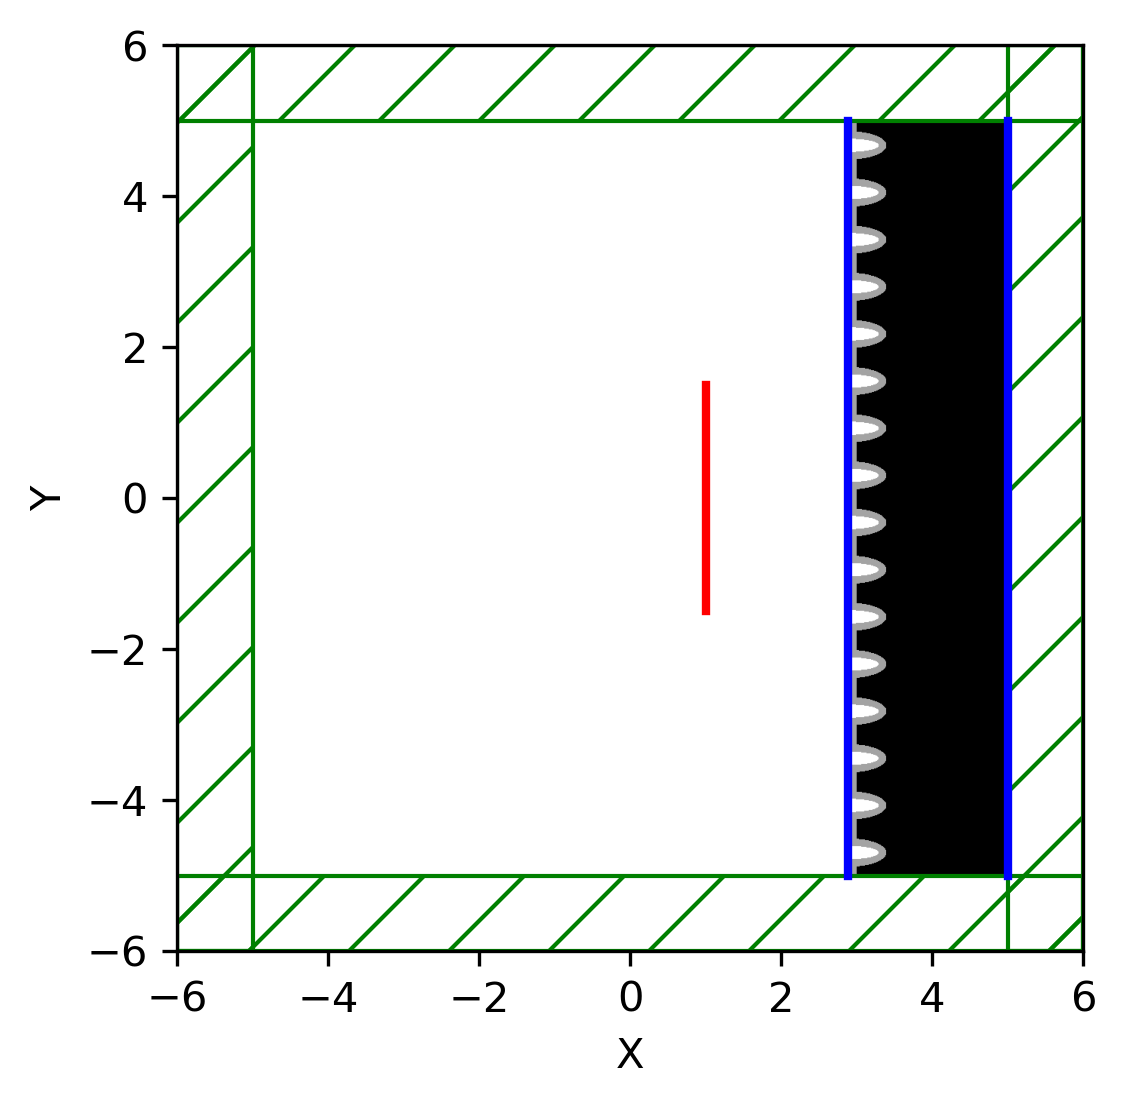

In [32]:
sim.reset_meep()

# Design texture
size_x = 0.4
size_y = 0.3
N = 15
D = (sy)/(N+1)


geometry = [mp.Block(
                    size = mp.Vector3(T_Si, sy, mp.inf), 
                    center = mp.Vector3(0.5*sx-0.5*(T_Si), 0),
                    material = cSi
                     ),
            mp.Block(
                    size=mp.Vector3(T_Arc, sy, mp.inf), 
                    center=mp.Vector3(0.5*sx-0.5*T_Arc-T_Si, 0),
                    material=Si3N4
                     )
           ]

for i in range(N, -1, -1):
            geometry.append( 
                   mp.Ellipsoid(
                            size = mp.Vector3(2*(size_x+T_Arc), 
                                              size_y*((size_x+T_Arc)/size_x), 
                                              mp.inf),
                            center = mp.Vector3(0.5*sx-(T_Si+T_Arc), -0.5*sy+size_y+D*i), 
                            material = Si3N4,
                            )
                            )

for i in range(N, -1, -1):
            geometry.append( 
                   mp.Ellipsoid(
                            size = mp.Vector3(2*(size_x), 
                                              size_y*((size_x+T_Arc)/size_x)-2*T_Arc, 
                                              mp.inf),
                            center = mp.Vector3(0.5*sx-(T_Si+T_Arc), -0.5*sy+size_y+D*i), 
                            material = mp.Medium(epsilon=eps_air),
                            )
                            )


geometry.append( 
            mp.Block(
                    size = mp.Vector3(2*size_x, sy, mp.inf),
                    center = (0.5*sx-(T_Si+T_Arc)-size_x, 0), 
                      material = mp.Medium(epsilon=eps_air),
                    )
                )

        
sim = mp.Simulation(
                    cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution
                    )

#refl_1_fr = mp.FluxRegion(
#                          center=mp.Vector3(0.5*sx-dpml-0.5*T_Si-1.1*T_Arc, 0),
#                          size=mp.Vector3(0, sy)
#                          )

refl_1 = sim.add_flux(fcen, df, nfreq, refl_1_fr)

tran_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx, 0), 
                          size=mp.Vector3(0, sy)
                          )
tran_1 = sim.add_flux(fcen, 
                      df, 
                      nfreq, 
                      tran_1_fr 
                      )

sim.load_minus_flux_data(refl_1, no_ARC_refl_data)

plt.figure(dpi=300)
sim.plot2D()
plt.show()


In [33]:
pt = mp.Vector3(0.5*sx-0.1, 0)
sim.run(mp.at_beginning(mp.output_epsilon),
                until_after_sources=mp.stop_when_fields_decayed(20, mp.Ez, pt, 1e-3))

with_ARC_refl_flux = mp.get_fluxes(refl_1)
with_ARC_tran_flux = mp.get_fluxes(tran_1)

flux_freqs = mp.get_flux_freqs(refl_1)

creating output file "./eps-000000000.h5"...


/Users/yu-chengchiou/opt/anaconda3/envs/mp/lib/python3.10/site-packages/meep/simulation.py:1343: RuntimeWarning: Note: your sources include frequencies outside the range of validity of the material models. This is fine as long as you eventually only look at outputs (fluxes, resonant modes, etc.) at valid frequencies.
  warnings.warn(warn_src, RuntimeWarning)
/Users/yu-chengchiou/opt/anaconda3/envs/mp/lib/python3.10/site-packages/meep/simulation.py:1347: RuntimeWarning: DFT frequency 1.0 is out of material's range of 1.2048192771084338-2.5
  warnings.warn(warn_dft_fmt.format(dftf, min_freq, max_freq), RuntimeWarning)


on time step 95 (time=0.475), 0.0424784 s/step
on time step 195 (time=0.975), 0.0401567 s/step
on time step 295 (time=1.475), 0.0403 s/step
on time step 394 (time=1.97), 0.0405947 s/step
on time step 493 (time=2.465), 0.0405511 s/step
on time step 591 (time=2.955), 0.0409177 s/step
on time step 689 (time=3.445), 0.040858 s/step
on time step 788 (time=3.94), 0.0407679 s/step
on time step 886 (time=4.43), 0.0411222 s/step
on time step 987 (time=4.935), 0.0399051 s/step
on time step 1088 (time=5.44), 0.0396615 s/step
on time step 1186 (time=5.93), 0.0408847 s/step
on time step 1284 (time=6.42), 0.0408398 s/step
on time step 1385 (time=6.925), 0.0396489 s/step
on time step 1486 (time=7.43), 0.0398929 s/step
on time step 1586 (time=7.93), 0.0401325 s/step
on time step 1683 (time=8.415), 0.0412691 s/step
on time step 1782 (time=8.91), 0.0406643 s/step
on time step 1882 (time=9.41), 0.0403371 s/step
on time step 1981 (time=9.905), 0.040741 s/step
on time step 2080 (time=10.4), 0.0404225 s/ste

on time step 13892 (time=69.46), 0.0404144 s/step
on time step 13992 (time=69.96), 0.0401779 s/step
on time step 14093 (time=70.465), 0.0398537 s/step
on time step 14194 (time=70.97), 0.0397213 s/step
on time step 14293 (time=71.465), 0.0404712 s/step
on time step 14394 (time=71.97), 0.0396471 s/step
on time step 14492 (time=72.46), 0.0408884 s/step
on time step 14590 (time=72.95), 0.0409819 s/step
on time step 14688 (time=73.44), 0.0411623 s/step
on time step 14770 (time=73.85), 0.0491356 s/step
on time step 14868 (time=74.34), 0.0408196 s/step
on time step 14968 (time=74.84), 0.0403423 s/step
on time step 15068 (time=75.34), 0.0400238 s/step
on time step 15166 (time=75.83), 0.0409184 s/step
on time step 15262 (time=76.31), 0.0419055 s/step
on time step 15360 (time=76.8), 0.0412171 s/step
on time step 15456 (time=77.28), 0.0417716 s/step
on time step 15554 (time=77.77), 0.0409573 s/step
on time step 15652 (time=78.26), 0.0410954 s/step
on time step 15746 (time=78.73), 0.0426275 s/step

In [34]:
no_ARC_refl_data

FluxData(E=array([-3.22327663e-07-4.82090554e-08j, -3.19075520e-07-7.28141476e-08j,
       -3.13824801e-07-9.70937422e-08j, ...,
       -1.92613664e-08+6.98032932e-09j, -1.85427984e-08+6.38222759e-09j,
       -1.78969310e-08+5.89768776e-09j]), H=array([-2.81689769e-05+4.18093917e-06j, -2.86480190e-05+2.21410410e-06j,
       -2.89894013e-05+2.15350706e-07j, ...,
       -2.40325574e-05+1.57715496e-05j, -2.42340455e-05+1.41855398e-05j,
       -2.43669962e-05+1.26428841e-05j]))

In [35]:
no_ARC_refl_flux

[1.3941896668586533e-06,
 1.4546469672436027e-06,
 1.517595743959103e-06,
 1.5831341643161167e-06,
 1.6513646918618115e-06,
 1.7223919496339058e-06,
 1.7963211197887345e-06,
 1.8732584480400108e-06,
 1.953314006627717e-06,
 2.0366051092414153e-06,
 2.1232580027172886e-06,
 2.2134064199731146e-06,
 2.307187760711339e-06,
 2.4047395646588955e-06,
 2.50619908179283e-06,
 2.611706801310593e-06,
 2.7214119734817695e-06,
 2.8354764360703036e-06,
 2.9540738314651992e-06,
 3.0773842809233816e-06,
 3.205587842951919e-06,
 3.3388613082315023e-06,
 3.477381003842755e-06,
 3.6213303446515783e-06,
 3.770907473474411e-06,
 3.926327892583342e-06,
 4.087820033944628e-06,
 4.255616382637213e-06,
 4.4299459557577155e-06,
 4.611033386314527e-06,
 4.799105749750115e-06,
 4.994403213004834e-06,
 5.197186939443534e-06,
 5.407739290397237e-06,
 5.6263562615701934e-06,
 5.853337098501985e-06,
 6.088977855274237e-06,
 6.333573096890612e-06,
 6.5874247040332465e-06,
 6.8508522767830625e-06,
 7.124198835572695e-

In [36]:
with_ARC_refl_flux

[-2.7510103627361623e-07,
 -2.9641840707968674e-07,
 -3.0702047764976526e-07,
 -3.06518198909088e-07,
 -2.9715023058515516e-07,
 -2.830950253031652e-07,
 -2.692676240789776e-07,
 -2.600282435115784e-07,
 -2.5824227659055525e-07,
 -2.649697093105535e-07,
 -2.797948146698833e-07,
 -3.0154889836758643e-07,
 -3.290407091226214e-07,
 -3.6144875509164106e-07,
 -3.9822537092554483e-07,
 -4.3862125925214684e-07,
 -4.811391621578487e-07,
 -5.232705382597824e-07,
 -5.617356289069265e-07,
 -5.931961522221543e-07,
 -6.151610954254084e-07,
 -6.266837485768192e-07,
 -6.285209200129612e-07,
 -6.22670196850547e-07,
 -6.115085926408636e-07,
 -5.969764614828179e-07,
 -5.802638172033187e-07,
 -5.622318299469054e-07,
 -5.444234589667694e-07,
 -5.301528204691975e-07,
 -5.24996818637722e-07,
 -5.361584343468088e-07,
 -5.706104963786193e-07,
 -6.325032685255617e-07,
 -7.207849103969936e-07,
 -8.281109917952708e-07,
 -9.417964001026089e-07,
 -1.04686105625636e-06,
 -1.1303840489327838e-06,
 -1.185741685446302

In [37]:
wl = []
Rs = []
Ts = []
flux_freqs = mp.get_flux_freqs(refl_1)
for i in range(nfreq):
    wl = np.append(wl, 1/flux_freqs[i])
    Rs = np.append(Rs,-with_ARC_refl_flux[i]/no_ARC_refl_flux[i])
    Ts = np.append(Ts,with_ARC_tran_flux[i]/no_ARC_refl_flux[i]) 
import pandas as pd
df = pd.DataFrame(list(zip(wl, Rs, Ts)), columns = ['wl', 'Rs', 'Ts'])
df.to_csv('ellipsoid_with_ARC.csv')

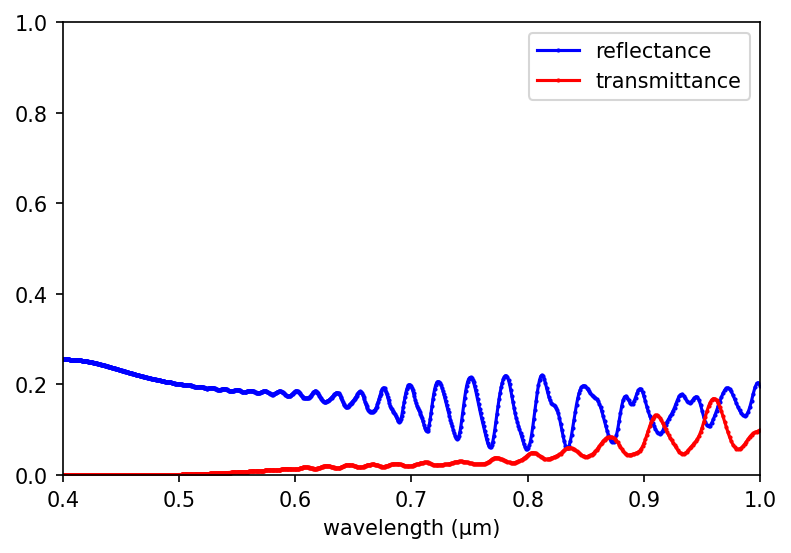

In [38]:
if mp.am_master():
    plt.figure(dpi=150)
    plt.plot(wl,Rs,'bo-',label='reflectance', markersize = 1)
    plt.plot(wl,Ts,'ro-',label='transmittance', markersize = 1)
    #plt.plot(wl,1-Rs-Ts,'go-',label='loss or Absorption', markersize = 1)
    plt.axis([.4, 1.0, 0, 1])
    plt.xlabel("wavelength (μm)")
    plt.legend(loc="upper right")
    plt.show()